In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plscan import PLSCAN
from scipy.sparse import csr_array

In [2]:
min_samples = 5
min_cluster_size = min_samples
data = np.load("data.npy")
mst = np.load("mst.npy")

Create all supported inputs:

In [3]:
from scipy.spatial.distance import squareform, pdist
from sklearn.neighbors import NearestNeighbors

num_neighbors = 10
num_points = data.shape[0]

knn = (
    NearestNeighbors(n_neighbors=num_neighbors)
    .fit(data)
    .kneighbors(data, return_distance=True)
)
g = csr_array(
    (
        knn[0][:, 1:].reshape(-1).astype(np.float32, copy=False),
        (
            np.repeat(np.arange(num_points, dtype=np.int32), num_neighbors - 1),
            knn[1][:, 1:].reshape(-1).astype(np.int32, copy=False),
        ),
    ),
    shape=(num_points, num_points),
)
con_dists = pdist(data)
dists = squareform(con_dists)

inputs = [(mst, num_points), knn, g, dists, con_dists]

Run on all supported inputs:

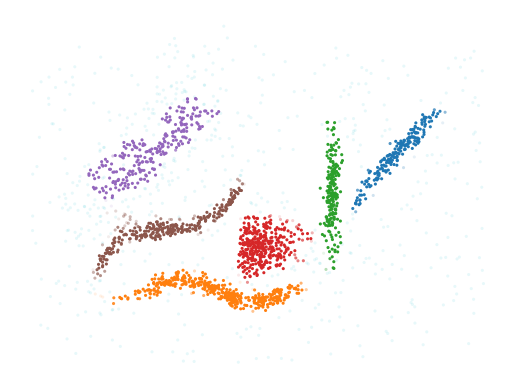

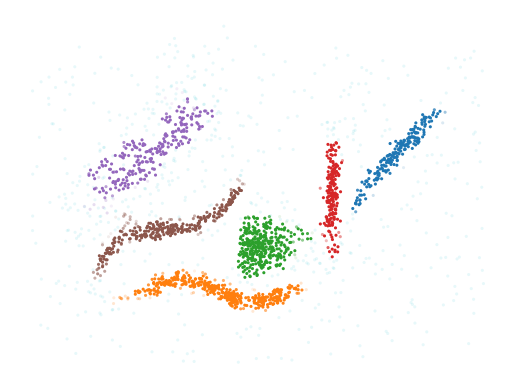

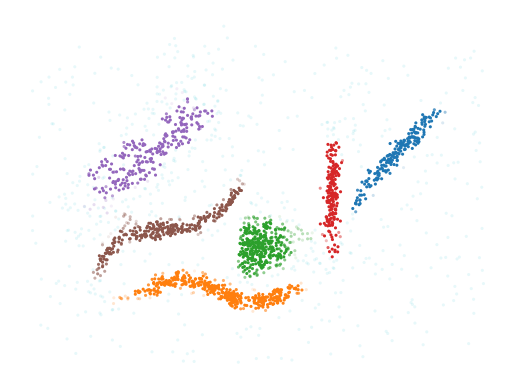

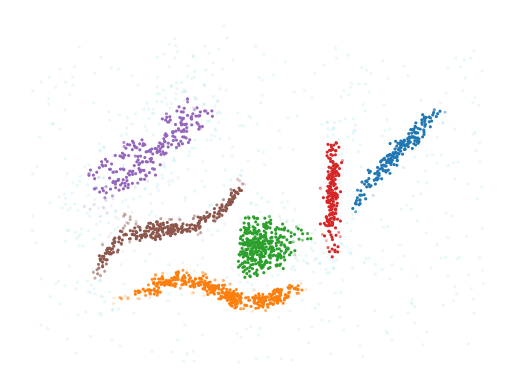

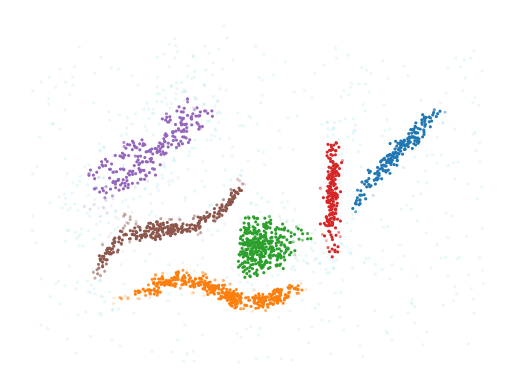

In [4]:
for input in inputs:
    c = PLSCAN(min_cluster_size=5.0).fit(input)
    plt.scatter(
        *data.T,
        c=c.labels_ % 10,
        alpha=np.maximum(0.1, c.probabilities_),
        s=5,
        linewidth=0,
        cmap="tab10",
    )
    plt.axis("off")
    plt.show()